# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"]).set_index(["type"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count
type,,,,,
Urban,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5
Urban,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72
Urban,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57
Urban,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34
Urban,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46


## Deliverable 1: Get a Summary DataFrame 

In [4]:
# 1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
drivers_count = pyber_data_df.drop_duplicates(["city"]).groupby(["type"]).sum()["driver_count"]
drivers_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_total

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
average_fare_type = fare_total/ride_count 
average_fare_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = fare_total/drivers_count
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
Pyber_Summary_df = pd.DataFrame({"Total Rides":ride_count,
                                "Total Drivers":drivers_count,
                                "Total Fares":fare_total,
                                "Average Fare per Ride":average_fare_type,
                                "Average Fare per Driver":average_fare_driver})
Pyber_Summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
Pyber_Summary_df.index.name = None

In [11]:
#  8. Format the columns.
Pyber_Summary_df["Total Drivers"]=Pyber_Summary_df["Total Drivers"].map("{:,.0f}".format)
Pyber_Summary_df["Total Rides"]=Pyber_Summary_df["Total Rides"].map("{:,.0f}".format)
Pyber_Summary_df["Total Fares"]=Pyber_Summary_df["Total Fares"].map("${:,.2f}".format)
Pyber_Summary_df["Average Fare per Ride"]=Pyber_Summary_df["Average Fare per Ride"].map("${:,.2f}".format)
Pyber_Summary_df["Average Fare per Driver"]=Pyber_Summary_df["Average Fare per Driver"].map("${:,.2f}".format)
Pyber_Summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sumfares_typedate_df = pd.DataFrame(pyber_data_df.groupby(["type", "date"]).sum()["fare"])

sumfares_typedate_df



fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [13]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sumfares_typedate_df = sumfares_typedate_df.reset_index()

In [14]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sumfares_typedate_pivot = sumfares_typedate_df.pivot(index= "date" ,columns = "type", values = "fare")
sumfares_typedate_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


In [15]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.

sumfares_janapril_df = sumfares_typedate_pivot.loc[sumfares_typedate_pivot.index <= '2019-04-29', :]
sumfares_janapril_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [16]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
sumfares_janapril_df.index = pd.to_datetime(sumfares_janapril_df.index)

In [17]:
# 14. Check that the datatype for the index is datetime using df.info()
sumfares_janapril_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sumfares_janapril_week_df = sumfares_janapril_df.resample("W").sum()
sumfares_janapril_week_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


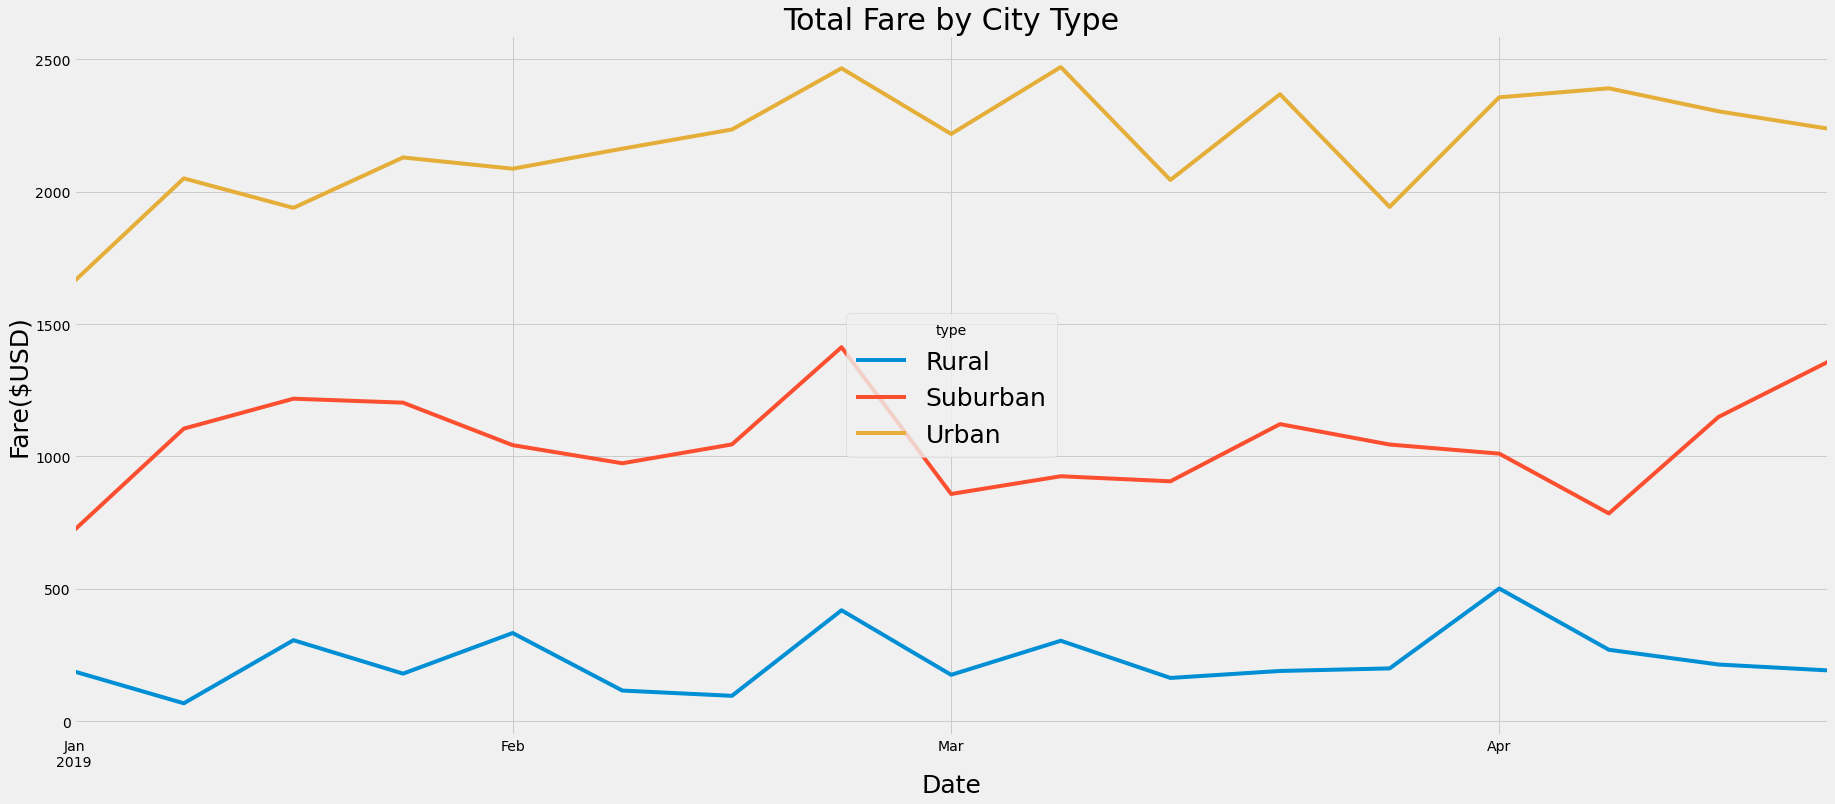

In [26]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = sumfares_janapril_week_df.plot(figsize=(28,12))
ax.set_title("Total Fare by City Type", fontsize = "30")
ax.set_xlabel("Date", fontsize = "25")
ax.set_ylabel("Fare($USD)", fontsize = "25")
ax.grid(True)
ax.legend(["Rural","Suburban", "Urban", ], title="type", loc="center", fontsize="25", mode="Expanded")


plt.savefig("analysis/PyBer_fare_summary.png")

plt.show()
